In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter
import matplotlib
import bt
import talib
from datetime import date, timedelta

#matplotlib.use('TkAgg')

rio_tinto = "rtppf"
lufthansa ="dlaky"
vw ="vwagy"
amazon = "amzn"
siemens_energy = "smegf"
intel = "intc"

def get_dates():
    today = date.today()
    
    last_year = today - timedelta(days=365)
    today =str(today)
    last_year = str(last_year)
    return today, last_year

def ema_strategy(ticker):
    ticker = ticker.lower()
    
    today, last_year = get_dates()
    
    try: 
        stock = bt.get(ticker,start=last_year, end=today)

        EMA_short=talib.EMA(stock[stock.columns[0]], timeperiod=10).to_frame()
        EMA_long=talib.EMA(stock[stock.columns[0]], timeperiod=40).to_frame()

        signal = EMA_long.copy()
        signal[EMA_long.isnull()]=0

        signal[EMA_short>EMA_long] = 1
        signal[EMA_short<EMA_long] = -1

        combined_df = bt.merge(signal,stock,EMA_short,EMA_long)
        combined_df.columns=["Signal","Price","EMA_short","EMA_long"]

        combined_df.plot(secondary_y=["Signal"], figsize=(20,10))
        plt.show()
    except:
        print("Ticker symbol invalid!")

def adx(ticker):
    ticker = ticker.lower()
    today, last_year = get_dates()
    import matplotlib.pyplot as plt
    try: 
        stock =bt.get('{ticker}:Open,{ticker}:High,{ticker}:Low,{ticker}:Close'.format(ticker=ticker),
                  start=last_year, 
                  end=today)
    
        
        stock.rename(columns={stock.columns[0]: "open",stock.columns[1]: "high",stock.columns[2]: "low",stock.columns[3]: "close" }, 
                 inplace = True)
        stock["ADX"] = talib.ADX(stock["high"],stock["low"],stock["close"], timeperiod = 14)
        stock["RSI"] = talib.RSI(stock["close"], timeperiod = 14)
        fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(20,10))

        ax1.set_ylabel("Price")
        ax1.plot(stock["close"])
        ax2.set_ylabel("ADX")
        ax2.plot(stock["ADX"])
        ax2.axhline(25,linestyle="dashed")
        ax3.set_ylabel("RSI")
        ax3.plot(stock["RSI"])
        ax3.axhline(30,linestyle="dashed")
        ax3.axhline(70,linestyle="dashed")
        ax1.set_title("Price, ADX & RSI")
        plt.show()
    except:
        print("Ticker symbol invalid!")


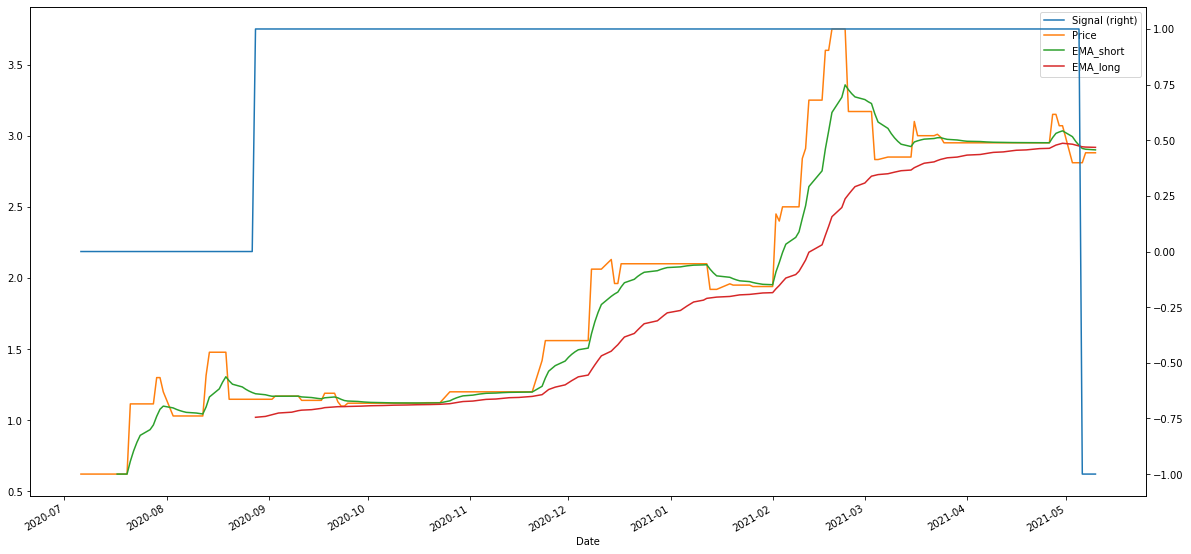

In [62]:
ema_strategy("bskzf")

In [27]:
from datetime import date
today = date.today()
#today =str(today)